# Ok how tf do I start lmao

rolling beta, rolling p-value , rolling R2, rolling beta, show the residual plot.

Easy as.

In [1]:
from helper import get_polygon_data, get_rolling_beta, get_rolling_stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
ticker = "AAPL"
bench_ticker = "SPY"

ticker_prices = get_polygon_data(ticker)[["close"]]
bench_prices = get_polygon_data(bench_ticker)[["close"]]
ticker_prices["pct_change"] = ticker_prices["close"].pct_change()
ticker_prices.columns = ["ticker_close", "ticker_pct"]
bench_prices["pct_change"] = bench_prices["close"].pct_change()
bench_prices.columns = ["bench_close", "bench_pct"]



In [3]:
get_rolling_beta(ticker_prices, bench_prices, 60)


1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
         ...   
497    0.719443
498    0.651461
499    0.676578
500    0.695705
501    0.708740
Length: 501, dtype: float64

In [4]:
stats = get_rolling_stats(ticker_prices, bench_prices, 60)


In [5]:
plot_data = pd.concat([ticker_prices, bench_prices, stats], axis = 1).dropna()
plot_data["residuals"] = plot_data["ticker_pct"] - (plot_data["beta"] * plot_data["bench_pct"] + plot_data["const"])
plot_data


,ticker_close,ticker_pct,bench_close,bench_pct,const,beta,p-value,r-squared,residuals
59,160.77,0.019791,401.35,0.014535,0.003335,1.091972,8.059514e-25,0.649928,0.000584
60,162.36,0.009890,403.70,0.005855,0.003337,1.092086,2.582490e-25,0.650769,0.000158
61,164.90,0.015644,409.39,0.014095,0.003315,1.087689,1.617254e-25,0.652709,-0.003002
62,166.17,0.007702,410.95,0.003811,0.003348,1.084924,7.039981e-25,0.646539,0.000219
63,165.63,-0.003250,408.67,-0.005548,0.003222,1.055728,1.248055e-22,0.622975,-0.000615
...,...,...,...,...,...,...,...,...,...
497,258.20,0.011478,601.30,0.011115,0.001191,0.719443,9.020009e-06,0.253621,0.002291
498,259.02,0.003176,601.34,0.000067,0.001686,0.651461,2.675475e-05,0.233164,0.001446
499,255.59,-0.013242,595.01,-0.010526,0.001523,0.676578,1.016288e-05,0.251425,-0.007643
500,252.20,-0.013263,588.22,-0.011412,0.001480,0.695705,3.930728e-06,0.268585,-0.006804


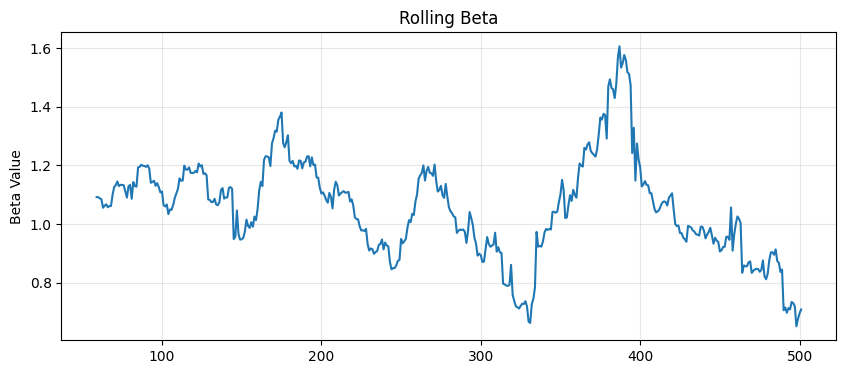

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(plot_data.index, plot_data['beta'],  label='Rolling Beta')
plt.title('Rolling Beta')
plt.ylabel('Beta Value')
plt.grid(True, alpha=0.3)
plt.show()


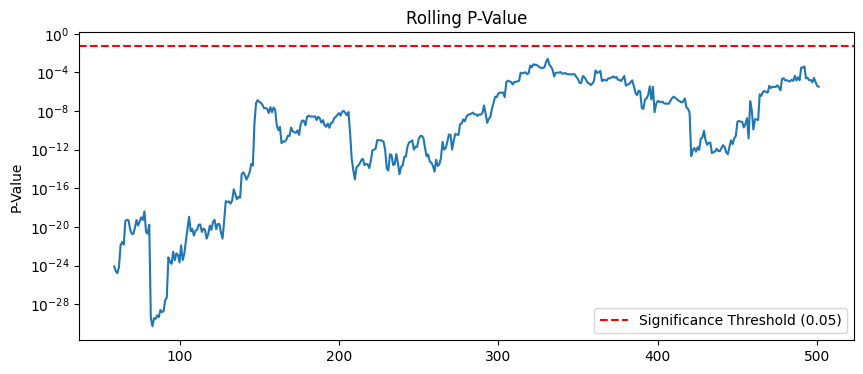

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(plot_data.index, plot_data['p-value'])
# Significance threshold at 0.05
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.yscale('log') # Useful because p-values can be extremely small
plt.title('Rolling P-Value')
plt.ylabel('P-Value')
plt.legend()
plt.show()


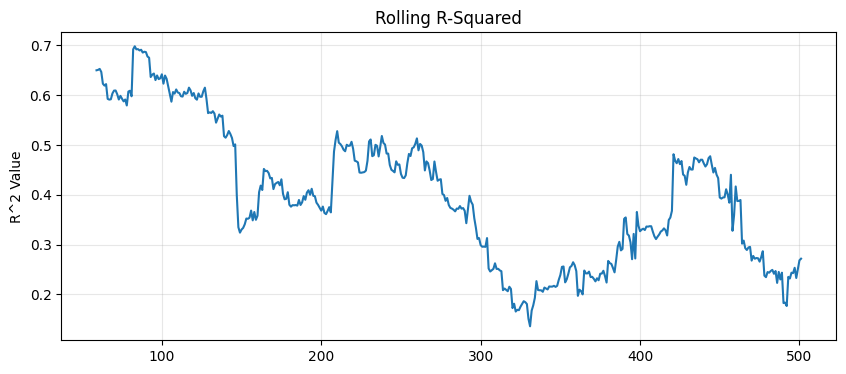

In [14]:
plt.figure(figsize=(10, 4))
plt.plot(plot_data.index, plot_data['r-squared'])
plt.title('Rolling R-Squared')
plt.ylabel('R^2 Value')
plt.grid(True, alpha=0.3)
plt.show()
